# DS 7331 - Machine Learning - Course Project
Team: Allison Roderick, Jayson Barker, Sandesh Ojha, Brandon Croom

Lab Number: Mini Project

## Model Creation/Parameters - 50pts

### US Focused Model

The code below represent the build out of the logistical regression model for the US Accidents data set for the entire US.

Perfom the initial setup in the three code blocks below. We'll import the necessary libraries required for this analysis. We'll then define helper functions that will be leveraged later in the analysis. Finally we'll import the  EDA that has already been performed. This will allow us to leverage the existing work and prevent duplication. It should be noted that for this specific analysis we have commented out the graphs that were built in the initial EDA. This is simply to assist in speeding up the logistic regression analysis. 

In [1]:
# Import libraries for data analysis
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler

In [21]:
#Define helper functions
def getMedianTemp(row):
    month = row['SM_Interim']
    state = row['State']
    
    try:
        result = medianTempByStateMonth[state,month]
    except:
        result = medianTempByMonth[month]
    finally:    
        return result

def getMedianPrecip(row):
    month = row['SM_Interim']
    state = row['State']
    
    try:
        result = medianPrecipByStateMonth[state,month]
    except:
        result = medianPrecipByMonth[month]
    finally:
        return result

def getMedianPressure(row):
    month = row['SM_Interim']
    state = row['State']
    
    try:
        result = medianPressureByStateMonth[state,month]
    except:
        result = medianPrecipByMonth[month]
    finally:
        return result

def getMedianWindChill(row):
    month = row['SM_Interim']
    state = row['State']
    
    try:
        result = medianWindChillByStateMonth[state,month]
    except:
        result = medianWindChillByMonth[month]
    finally:
        return result

def getMedianVis(row):
    month = row['SM_Interim']
    state = row['State']
    
    try:
        result = medianVisByStateMonth[state,month]
    except:
        result = medianVisByMonth[month]
    finally:
        return result

def getMedianWindSpeed(row):
    month = row['SM_Interim']
    state = row['State']
    
    try:
        result = medianWindSpeedByStateMonth[state,month]
    except:
        result = medianWindSpeedByMonth[month]
    finally:
        return result

def getMedianHumidity(row):
    month = row['SM_Interim']
    state = row['State']
    
    try:
        result = medianHumidityByStateMonth[state,month]
    except:
        result = medianHumidityByMonth[month]
    finally:
        return result

def checkMissingValues(df):
    missing_df = df.isnull().sum(axis=0).reset_index()
    missing_df.columns = ['columns_name','missing_count']
    missing_df['missing_ratio'] = missing_df['missing_count'] /df.shape[0]
    return missing_df.loc[missing_df['missing_ratio']>0.00]

In [3]:
#Run the initial EDA from the first lab for the project. 
#NOTE: We've commented out the graphs and analysis portions from the EDA just to make things run faster, hence the "Skinny"
#version of the filename
%run ./JB_AR_BC_SO_Project1_Skinny.ipynb

Initial Shape:  (2974335, 49)
Deduplication Shape:  (2974335, 49)
No Duplicate Data Found
['MapQuest' 'MapQuest-Bing' 'Bing']
['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' nan 'S' 'VAR'
 'CALM' 'N']
['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'W' 'NNW' 'NNE' 'S' 'N' 'VAR' 'SE'
 'SSE' 'ESE' 'E' 'NE' 'ENE' nan 'CALM']
(2974335, 41)
ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
Distance(mi)             float64
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pr

/home/jbcroom/anaconda3/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


Now we'll copy the EDA ready dataframe into a secondary dataframe. This will allow us to get back to initial state if something goes awry.

In [5]:
# Copy the dataframe from the original as we'll be manipulating it for analysis
df2 = df.sample(n=1000000).copy()

Build out the initial list of features we want to put through the logistic regression model. We'll keep the majority of the features. City, Country, ZipCode and the accident End date values will be removed for this initial pass. We'll also create a temporary column for Start Month for assistance with a few future items that need to be addressed with this field

In [6]:
#Take an initial pass at the features we want to run through logistic regression
featuresList = ['Severity','Start_Lat','Start_Lng','Distance(mi)','Side','Temperature(F)','Wind_Chill(F)',
                'Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)',
                'PointOfInterest','Bump','Crossing','Yield','Junction','No_Exit','Railway',
                'Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset',
                'Start_Month','Start_Hour','Start_Weekday','Time_Duration(min)','State','Weather_Condition','Timezone']

#filter down the dataframe to just the features needed
df2 = df2[featuresList]

#duplicate the Start Month. This will help us later
df2['SM_Interim'] = df2['Start_Month']

Break out our categorical variables into dummy numerics in order for the logistic regression to work correctly.

In [7]:
# transform categories into dummy numerics
cols_to_transform = ['Side','Sunrise_Sunset','Start_Weekday','Start_Month','Weather_Condition']

df2 = pd.get_dummies(df2, columns = cols_to_transform)

#check to make sure everything transformed
df2.dtypes

Severity                                float64
Start_Lat                               float64
Start_Lng                               float64
Distance(mi)                            float64
Temperature(F)                          float64
                                         ...   
Weather_Condition_Tornado                 uint8
Weather_Condition_Volcanic Ash            uint8
Weather_Condition_Widespread Dust         uint8
Weather_Condition_Wintry Mix              uint8
Weather_Condition_Wintry Mix / Windy      uint8
Length: 157, dtype: object

Now that we've expanded out our categorical variables let's look for missing values and determine how we should handle these values if they exist.

In [8]:
#Let's look to see what missing data has been created by the dummy numerics
checkMissingValues(df2)

,columns_name,missing_count,missing_ratio
0,Severity,197,0.000197
1,Start_Lat,197,0.000197
2,Start_Lng,197,0.000197
3,Distance(mi),197,0.000197
4,Temperature(F),19007,0.019007
5,Wind_Chill(F),622850,0.622850
6,Humidity(%),20065,0.020065
7,Pressure(in),16410,0.016410
8,Visibility(mi),22193,0.022193
9,Wind_Speed(mph),148558,0.148558


Go ahead and drop rows for all the items except those that are weather related. We'll impute those once we get our test/train splits built.

In [9]:
cleanList = ['SM_Interim','State','Turning_Loop','Traffic_Signal','Traffic_Calming','Stop','Station',
             'Roundabout','Railway','No_Exit','Junction','Yield','Crossing','Bump','PointOfInterest',
             'Distance(mi)','Start_Lng','Start_Lat','Severity']

df2.dropna(axis=0,how='any',subset=cleanList,inplace=True)
checkMissingValues(df2)

,columns_name,missing_count,missing_ratio
4,Temperature(F),18810,0.018814
5,Wind_Chill(F),622653,0.622776
6,Humidity(%),19868,0.019872
7,Pressure(in),16213,0.016216
8,Visibility(mi),21996,0.022000
9,Wind_Speed(mph),148361,0.148390
10,Precipitation(in),671534,0.671666


From the table above and based on the feature set we've chosen it looks like only weather realted values are missing. Knowing this we'll proceed to build out our test and training datasets using an 80/20 split. We will then determine the median values for these missing weather values in the training dataset and the push those to the test data set.

In [10]:
#Build the test/train split. Use a split of 80/20
#Get the values for Y
y = df2['Severity'].values

#Delete off the values for Y so they don't get duplicated in the split
del df2['Severity']

#get everything else that we want to predict off of
x = df2.values

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

Now that we have our test/train splits convert the numpy arrays back to dataframes while we continue data manipulation

In [11]:
#Convert the train/test splits back to dataframes so we can impute missing data. 
df_X_train = pd.DataFrame.from_records(X_train)
df_X_test = pd.DataFrame.from_records(X_test)
df_X_train.columns = df2.columns
df_X_test.columns = df2.columns

Let's check to make sure we're maintaining a consistent shape between our test and train dataframes. This is more of a sanity check for future items than anyting

In [12]:
#Check the dataframe shapes for sanity
print(df_X_train.shape)
print(df_X_test.shape)

(799842, 156)
(199961, 156)


Since we know our weather data is what's missing in both the training and test sets let's try to fix it. We'll start by finding the median for each weather value by state and month. This should provide us the most accurate value for imputing the missing value. We'll also calculate the median value by month. This is simply a precaution in the event we can't find a state/month combination. Finally we'll apply these values to the dataframes.

In [13]:
#Given that we're looking at weather based conditions take median values for each of the features. Initially start by
#determining median by state and start month. To also cover any missing values that may not be present with this 
#combination calculate the overall median by month. 
medianTempByStateMonth = df_X_train.groupby(['State','SM_Interim'])['Temperature(F)'].median(skipna=True)
medianPrecipByStateMonth  = df_X_train.groupby(['State','SM_Interim'])['Precipitation(in)'].median(skipna=True)
medianPressureByStateMonth  = df_X_train.groupby(['State','SM_Interim'])['Pressure(in)'].median(skipna=True)
medianWindChillByStateMonth  = df_X_train.groupby(['State','SM_Interim'])['Wind_Chill(F)'].median(skipna=True)
medianVisByStateMonth  = df_X_train.groupby(['State','SM_Interim'])['Visibility(mi)'].median(skipna=True)
medianWindSpeedByStateMonth  = df_X_train.groupby(['State','SM_Interim'])['Wind_Speed(mph)'].median(skipna=True)
medianHumidityByStateMonth  = df_X_train.groupby(['State','SM_Interim'])['Humidity(%)'].median(skipna=True)

medianTempByMonth = df_X_train.groupby(['SM_Interim'])['Temperature(F)'].median(skipna=True)
medianPrecipByMonth  = df_X_train.groupby(['SM_Interim'])['Precipitation(in)'].median(skipna=True)
medianPressureByMonth  = df_X_train.groupby(['SM_Interim'])['Pressure(in)'].median(skipna=True)
medianWindChillByMonth  = df_X_train.groupby(['SM_Interim'])['Wind_Chill(F)'].median(skipna=True)
medianVisByMonth  = df_X_train.groupby(['SM_Interim'])['Visibility(mi)'].median(skipna=True)
medianWindSpeedByMonth  = df_X_train.groupby(['SM_Interim'])['Wind_Speed(mph)'].median(skipna=True)
medianHumidityByMonth  = df_X_train.groupby(['SM_Interim'])['Humidity(%)'].median(skipna=True)

In [14]:
df_X_train.loc[pd.isnull(df_X_train['Temperature(F)']),'Temperature(F)'] = df_X_train.swifter.apply(getMedianTemp, axis=1)
df_X_train.loc[pd.isnull(df_X_train['Precipitation(in)']),'Precipitation(in)'] = df_X_train.swifter.apply(getMedianPrecip,axis=1)
df_X_train.loc[pd.isnull(df_X_train['Pressure(in)']),'Pressure(in)'] = df_X_train.swifter.apply(getMedianPressure,axis=1)
df_X_train.loc[pd.isnull(df_X_train['Wind_Chill(F)']),'Wind_Chill(F)'] = df_X_train.swifter.apply(getMedianWindChill,axis=1)
df_X_train.loc[pd.isnull(df_X_train['Visibility(mi)']),'Visibility(mi)'] = df_X_train.swifter.apply(getMedianVis,axis=1)
df_X_train.loc[pd.isnull(df_X_train['Wind_Speed(mph)']),'Wind_Speed(mph)'] = df_X_train.swifter.apply(getMedianWindSpeed,axis=1)
df_X_train.loc[pd.isnull(df_X_train['Humidity(%)']),'Humidity(%)'] = df_X_train.swifter.apply(getMedianHumidity,axis=1)
    
#if anything else remains we'll zero it out
df_X_train['Precipitation(in)'].fillna(0,inplace=True)
df_X_train['Wind_Chill(F)'].fillna(0,inplace=True)
df_X_train['Wind_Speed(mph)'].fillna(0,inplace=True)
df_X_train['Temperature(F)'].fillna(0,inplace=True)
df_X_train['Precipitation(in)'].fillna(0,inplace=True)
df_X_train['Visibility(mi)'].fillna(0,inplace=True)
df_X_train['Humidity(%)'].fillna(0,inplace=True)

In [22]:
df_X_test.loc[pd.isnull(df_X_test['Temperature(F)']),'Temperature(F)'] = df_X_test.swifter.apply(getMedianTemp, axis=1)
df_X_test.loc[pd.isnull(df_X_test['Precipitation(in)']),'Precipitation(in)'] = df_X_test.swifter.apply(getMedianPrecip,axis=1)
df_X_test.loc[pd.isnull(df_X_test['Pressure(in)']),'Pressure(in)'] = df_X_test.swifter.apply(getMedianPressure,axis=1)
df_X_test.loc[pd.isnull(df_X_test['Wind_Chill(F)']),'Wind_Chill(F)'] = df_X_test.swifter.apply(getMedianWindChill,axis=1)
df_X_test.loc[pd.isnull(df_X_test['Visibility(mi)']),'Visibility(mi)'] = df_X_test.swifter.apply(getMedianVis,axis=1)
df_X_test.loc[pd.isnull(df_X_test['Wind_Speed(mph)']),'Wind_Speed(mph)'] = df_X_test.swifter.apply(getMedianWindSpeed,axis=1)
df_X_test.loc[pd.isnull(df_X_test['Humidity(%)']),'Humidity(%)'] = df_X_test.swifter.apply(getMedianHumidity,axis=1)
    
#if anything else remains we'll zero it out
df_X_test['Precipitation(in)'].fillna(0,inplace=True)
df_X_test['Wind_Chill(F)'].fillna(0,inplace=True)
df_X_test['Wind_Speed(mph)'].fillna(0,inplace=True)
df_X_test['Temperature(F)'].fillna(0,inplace=True)
df_X_test['Precipitation(in)'].fillna(0,inplace=True)
df_X_test['Visibility(mi)'].fillna(0,inplace=True)
df_X_test['Humidity(%)'].fillna(0,inplace=True)

Let's verify that we've imputed all the missing values and now have a clean data set.

In [23]:
#Let's make sure we have everthing accounted for
checkMissingValues(df_X_test)

,columns_name,missing_count,missing_ratio


In [24]:
#Let's make sure we have everthing accounted for
checkMissingValues(df_X_train)

,columns_name,missing_count,missing_ratio


Now that we've confirmed out data is clean. We have one final clean up item to address. We need to remove th SM_Interim column from both dataframes as is duplicative.

In [25]:
#drop the interim columns for Start Month  and State that was used for imputing
df_X_test.drop(['SM_Interim'],axis=1,inplace=True)
df_X_train.drop(['SM_Interim'],axis=1,inplace=True)

df_X_test.drop(['State'],axis=1,inplace=True)
df_X_train.drop(['State'],axis=1,inplace=True)

Check to make sure our dataframes are shaped the same.

In [26]:
#Check the dataframe shapes for sanity
print(df_X_train.shape)
print(df_X_test.shape)

(799842, 154)
(199961, 154)


In [27]:
#convert our test/train dataframes to numpy arrays
X_train = df_X_train.to_numpy()
X_test = df_X_test.to_numpy()

Execute out logistic regression analysis on the data.

In [28]:
# logistic regression
logistic_regression= LogisticRegression(max_iter = 4000)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/home/jbcroom/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jbcroom/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [29]:
# Accuracy | Accuracy = (TP+TN)/Total
print('Accuracy: ',mt.accuracy_score(y_test, y_pred))

Accuracy:  0.69330519451293


Based on the accurracy calculation we're at 69% accuracy with this model. Ideally we would like to model accuracy to be higher. The confusion matrix below also confirms that we're OK at predicting but not great.

In [31]:
conf = mt.confusion_matrix(y_test,y_pred)
print('Confusion Matrix: ')
print(conf)

Confusion Matrix: 
[[     0     50      5      0]
 [     0 123602  10354    154]
 [     0  44831  14845    111]
 [     0   4855    967    187]]


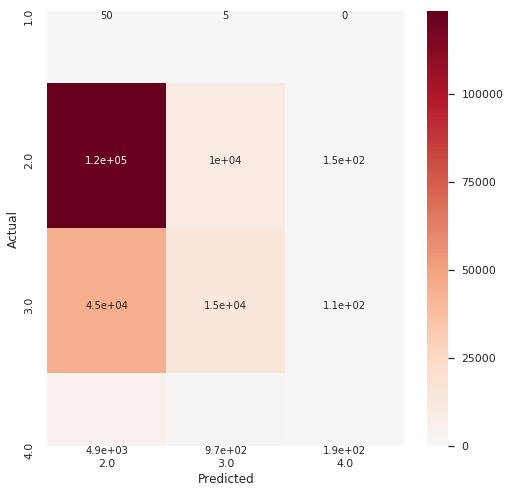

In [32]:
# Confusion matrix

fig, ax = plt.subplots(figsize=(8, 8))

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])


annot_kws = {"ha": 'center',"va": 'top'}
ax = sns.heatmap(confusion_matrix, annot=True, annot_kws=annot_kws, cmap ='RdBu_r', center=0)

In [33]:
#Coefficients
weights = logistic_regression.coef_.T # take transpose to make a column vector
variable_names = df2.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

Start_Lat has weight of -0.0033575343065668055
Start_Lng has weight of -0.0028262279665836163
Distance(mi) has weight of -1.6312223824657497
Temperature(F) has weight of 0.008060798237584403
Wind_Chill(F) has weight of -0.003976287290863199
Humidity(%) has weight of 0.0002844235967002938
Pressure(in) has weight of -0.15994613964637014
Visibility(mi) has weight of -0.017427963296672004
Wind_Speed(mph) has weight of -0.007288532325654409
Precipitation(in) has weight of -0.4484154641441944
PointOfInterest has weight of -0.08043599070956922
Bump has weight of -0.06321160828284858
Crossing has weight of 0.33803879307959894
Yield has weight of 0.201426104727235
Junction has weight of -1.3424764760525885
No_Exit has weight of -0.28642279898052697
Railway has weight of -0.039508040371981024
Roundabout has weight of -0.014168120706424371
Station has weight of 0.09977971776101238
Stop has weight of 0.19777268453404526
Traffic_Calming has weight of -0.13230813143485287
Traffic_Signal has weight o

The table above lists the non-normalized coefficients for the model. We'll normalize them next to make it more interpretable

In [34]:
#NOTE: Code below adapted from the course lectures
# we want to normalize the features based upon the mean and standard deviation of each column. 

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set 

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear') 
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set predictions

/home/jbcroom/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The accuracy of the scaled model has not changed.

In [35]:
acc = mt.accuracy_score(y_test,y_hat)
print('Accuracy:', acc )

Accuracy: 0.6936852686273823


In [36]:
conf = mt.confusion_matrix(y_test,y_hat)
print('Confusion Matrix:')
print(conf)

Confusion Matrix:
[[     0     50      5      0]
 [     0 123600  10355    155]
 [     0  44754  14924    109]
 [     0   4862    961    186]]


The table below lists the normalized coefficients for the model. We'll interpret these coefficients in the interpretation section below.

In [50]:
# output the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = df_X_train.columns
zip_vars = zip(weights,variable_names)

for coef, name in zip_vars:
    print(name, 'has weight of', coef[0])

Start_Lat has weight of 0.025818672149562683
Start_Lng has weight of -0.05743535138080002
Distance(mi) has weight of -0.18256789037513138
Temperature(F) has weight of 0.11387836814172972
Wind_Chill(F) has weight of -0.00375812503639448
Humidity(%) has weight of 0.015314450729849079
Pressure(in) has weight of 0.06342468184367805
Visibility(mi) has weight of 0.004461423236443088
Wind_Speed(mph) has weight of -0.002618953025791767
Precipitation(in) has weight of -0.05914064462039909
PointOfInterest has weight of -0.008975652449912195
Bump has weight of -0.003547159642782183
Crossing has weight of 0.06021199782153623
Yield has weight of 0.014188168971751753
Junction has weight of -0.15765713722191407
No_Exit has weight of -0.03521433513897266
Railway has weight of -0.004459188006996383
Roundabout has weight of -0.007402690453678194
Station has weight of 0.009771482587197322
Stop has weight of 0.024379482282088142
Traffic_Calming has weight of -0.02144409857230218
Traffic_Signal has weight 

Let's plot the coefficients of the variables to see which ones have the most pull and which ones we may be able to use to reduce the model.

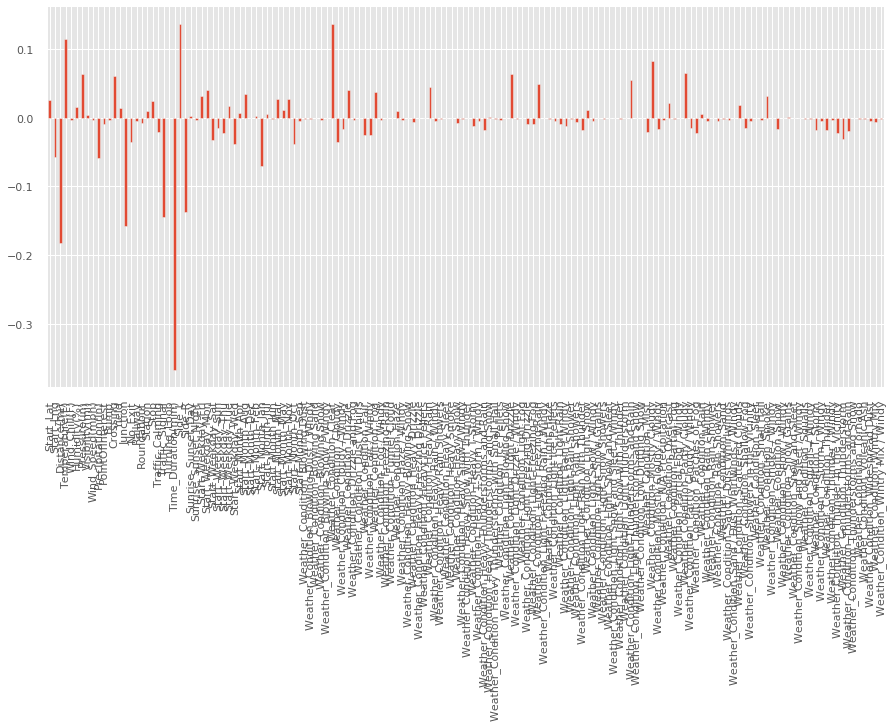

In [47]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.style.use('ggplot')

variable_names = df_X_train.columns

weights = pd.Series(lr_clf.coef_[0],index=variable_names)
weights.plot(kind='bar')
plt.show()

Looking at the graph it seems coefficients greater than 0.1 and less than -0.1 have the greatest influence. Let's determine what those are and see if just using them helps the model accuracy.

In [56]:
# output the coefficients
coefToKeep = []
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = df_X_train.columns
for coef, name in zip(weights,variable_names):
    if coef[0] < -0.10 or coef[0] > 0.10:
        print(name, 'has weight of', coef[0])
        coefToKeep.append(name)

Start_Lat has weight of 0.11479118321883569
Start_Lng has weight of -0.3940663109033657
Distance(mi) has weight of 0.279755627264862
Temperature(F) has weight of 0.1051466934831793


In [57]:
df_X_Train2 = pd.DataFrame.from_records(X_train_scaled)
df_X_Test2 = pd.DataFrame.from_records(X_test_scaled)
df_X_Train2.columns = df_X_train.columns
df_X_Test2.columns = df_X_test.columns

In [58]:
df_X_Train2 = df_X_Train2[coefToKeep]
df_X_Test2 = df_X_Test2[coefToKeep]

#convert our test/train dataframes to numpy arrays
X_train2 = df_X_Train2.to_numpy()
X_test2 = df_X_Test2.to_numpy()

In [59]:
#NOTE: Code below adapted from the course lectures
# we want to normalize the features based upon the mean and standard deviation of each column. 
# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train2) # find scalings for each column that make this zero mean and unit std

X_train2_scaled = scl_obj.transform(X_train2) # apply to training
X_test2_scaled = scl_obj.transform(X_test2) # apply those means and std to the test set 

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear') 
lr_clf.fit(X_train2_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test2_scaled) # get test set predictions

/home/jbcroom/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The accuracy of the new model with fewer coefficients is less than the original model. 

In [60]:
acc = mt.accuracy_score(y_test,y_hat)
print('Accuracy:', acc )

Accuracy: 0.6728662089107376


In [61]:
conf = mt.confusion_matrix(y_test,y_hat)
print('Confusion Matrix:')
print(conf)

Confusion Matrix:
[[     0     55      0      0]
 [     0 133523    563     24]
 [     0  58672    994    121]
 [     0   5484    495     30]]


### State Focused Model

Since our overall US model didn't have great accuracy lets see if we get better accuracy with a state specific model. To simplify we'll focus in on the top three states: California, Texas and Florida.

In [221]:
states = ['CA','TX','FL']
df2 = df[df.State.isin(states)].copy()
df2.shape

(1184980, 55)

In [222]:
#Take an initial pass at the features we want to run through logistic regression
featuresList = ['Severity','Start_Lat','Start_Lng','Distance(mi)','Side','Temperature(F)','Wind_Chill(F)',
                'Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)',
                'PointOfInterest','Bump','Crossing','Yield','Junction','No_Exit','Railway',
                'Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset',
                'Start_Month','Start_Weekday','Start_Hour','Time_Duration(min)','State','Weather_Condition']

#filter down the dataframe to just the features needed
df2 = df2[featuresList]

#duplicate the Start Month. This will help us later
df2['SM_Interim'] = df2['Start_Month']
df2['ST'] = df2['State']

In [223]:
# transform categories into dummy numerics
cols_to_transform = ['Side','Sunrise_Sunset','Start_Weekday','Start_Month','Weather_Condition','ST']

df2 = pd.get_dummies(df2, columns = cols_to_transform)

#check to make sure everything transformed
df2.dtypes

Severity                                     float64
Start_Lat                                    float64
Start_Lng                                    float64
Distance(mi)                                 float64
Temperature(F)                               float64
                                              ...   
Weather_Condition_Widespread Dust / Windy      uint8
Weather_Condition_Wintry Mix                   uint8
ST_CA                                          uint8
ST_FL                                          uint8
ST_TX                                          uint8
Length: 140, dtype: object

In [224]:
#Let's look to see what missing data has been created by the dummy numerics
checkMissingValues(df2)

,columns_name,missing_count,missing_ratio
4,Temperature(F),24324,0.020527
5,Wind_Chill(F),866886,0.731562
6,Humidity(%),26148,0.022066
7,Pressure(in),18742,0.015816
8,Visibility(mi),22405,0.018907
9,Wind_Speed(mph),188233,0.158849
10,Precipitation(in),844454,0.712631


In [225]:
cleanList = ['SM_Interim','Turning_Loop','Traffic_Signal','Traffic_Calming','Stop','Station',
             'Roundabout','Railway','No_Exit','Junction','Yield','Crossing','Bump','PointOfInterest',
             'Distance(mi)','Start_Lng','Start_Lat','Severity']

df2.dropna(axis=0,how='any',subset=cleanList,inplace=True)
checkMissingValues(df2)

,columns_name,missing_count,missing_ratio
4,Temperature(F),24324,0.020527
5,Wind_Chill(F),866886,0.731562
6,Humidity(%),26148,0.022066
7,Pressure(in),18742,0.015816
8,Visibility(mi),22405,0.018907
9,Wind_Speed(mph),188233,0.158849
10,Precipitation(in),844454,0.712631


In [226]:
#Build the test/train split. Use a split of 80/20
#Get the values for Y
y = df2['Severity'].values

#Delete off the values for Y so they don't get duplicated in the split
del df2['Severity']

#get everything else that we want to predict off of
x = df2.values

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [227]:
#Convert the train/test splits back to dataframes so we can impute missing data. 
df_X_train = pd.DataFrame.from_records(X_train)
df_X_test = pd.DataFrame.from_records(X_test)
df_X_train.columns = df2.columns
df_X_test.columns = df2.columns

In [228]:
#Check the dataframe shapes for sanity
print(df_X_train.shape)
print(df_X_test.shape)

(947984, 139)
(236996, 139)


In [229]:
#Given that we're looking at weather based conditions take median values for each of the features. Initially start by
#determining median by state and start month. To also cover any missing values that may not be present with this 
#combination calculate the overall median by month. 
medianTempByStateMonth = df_X_train.groupby(['State','SM_Interim'])['Temperature(F)'].median(skipna=True)
medianPrecipByStateMonth  = df_X_train.groupby(['State','SM_Interim'])['Precipitation(in)'].median(skipna=True)
medianPressureByStateMonth  = df_X_train.groupby(['State','SM_Interim'])['Pressure(in)'].median(skipna=True)
medianWindChillByStateMonth  = df_X_train.groupby(['State','SM_Interim'])['Wind_Chill(F)'].median(skipna=True)
medianVisByStateMonth  = df_X_train.groupby(['State','SM_Interim'])['Visibility(mi)'].median(skipna=True)
medianWindSpeedByStateMonth  = df_X_train.groupby(['State','SM_Interim'])['Wind_Speed(mph)'].median(skipna=True)
medianHumidityByStateMonth  = df_X_train.groupby(['State','SM_Interim'])['Humidity(%)'].median(skipna=True)

medianTempByMonth = df_X_train.groupby(['SM_Interim'])['Temperature(F)'].median(skipna=True)
medianPrecipByMonth  = df_X_train.groupby(['SM_Interim'])['Precipitation(in)'].median(skipna=True)
medianPressureByMonth  = df_X_train.groupby(['SM_Interim'])['Pressure(in)'].median(skipna=True)
medianWindChillByMonth  = df_X_train.groupby(['SM_Interim'])['Wind_Chill(F)'].median(skipna=True)
medianVisByMonth  = df_X_train.groupby(['SM_Interim'])['Visibility(mi)'].median(skipna=True)
medianWindSpeedByMonth  = df_X_train.groupby(['SM_Interim'])['Wind_Speed(mph)'].median(skipna=True)
medianHumidityByMonth  = df_X_train.groupby(['SM_Interim'])['Humidity(%)'].median(skipna=True)

In [230]:
df_X_train.loc[pd.isnull(df_X_train['Temperature(F)']),'Temperature(F)'] = df_X_train.swifter.apply(getMedianTemp, axis=1)
df_X_train.loc[pd.isnull(df_X_train['Precipitation(in)']),'Precipitation(in)'] = df_X_train.swifter.apply(getMedianPrecip,axis=1)
df_X_train.loc[pd.isnull(df_X_train['Pressure(in)']),'Pressure(in)'] = df_X_train.swifter.apply(getMedianPressure,axis=1)
df_X_train.loc[pd.isnull(df_X_train['Wind_Chill(F)']),'Wind_Chill(F)'] = df_X_train.swifter.apply(getMedianWindChill,axis=1)
df_X_train.loc[pd.isnull(df_X_train['Visibility(mi)']),'Visibility(mi)'] = df_X_train.swifter.apply(getMedianVis,axis=1)
df_X_train.loc[pd.isnull(df_X_train['Wind_Speed(mph)']),'Wind_Speed(mph)'] = df_X_train.swifter.apply(getMedianWindSpeed,axis=1)
df_X_train.loc[pd.isnull(df_X_train['Humidity(%)']),'Humidity(%)'] = df_X_train.swifter.apply(getMedianHumidity,axis=1)
    
#if anything else remains we'll zero it out
df_X_train['Precipitation(in)'].fillna(0,inplace=True)
df_X_train['Wind_Chill(F)'].fillna(0,inplace=True)
df_X_train['Wind_Speed(mph)'].fillna(0,inplace=True)
df_X_train['Temperature(F)'].fillna(0,inplace=True)
df_X_train['Precipitation(in)'].fillna(0,inplace=True)
df_X_train['Visibility(mi)'].fillna(0,inplace=True)
df_X_train['Humidity(%)'].fillna(0,inplace=True)

/home/jbcroom/anaconda3/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [231]:
df_X_test.loc[pd.isnull(df_X_test['Temperature(F)']),'Temperature(F)'] = df_X_test.swifter.apply(getMedianTemp, axis=1)
df_X_test.loc[pd.isnull(df_X_test['Precipitation(in)']),'Precipitation(in)'] = df_X_test.swifter.apply(getMedianPrecip,axis=1)
df_X_test.loc[pd.isnull(df_X_test['Pressure(in)']),'Pressure(in)'] = df_X_test.swifter.apply(getMedianPressure,axis=1)
df_X_test.loc[pd.isnull(df_X_test['Wind_Chill(F)']),'Wind_Chill(F)'] = df_X_test.swifter.apply(getMedianWindChill,axis=1)
df_X_test.loc[pd.isnull(df_X_test['Visibility(mi)']),'Visibility(mi)'] = df_X_test.swifter.apply(getMedianVis,axis=1)
df_X_test.loc[pd.isnull(df_X_test['Wind_Speed(mph)']),'Wind_Speed(mph)'] = df_X_test.swifter.apply(getMedianWindSpeed,axis=1)
df_X_test.loc[pd.isnull(df_X_test['Humidity(%)']),'Humidity(%)'] = df_X_test.swifter.apply(getMedianHumidity,axis=1)
    
#if anything else remains we'll zero it out
df_X_test['Precipitation(in)'].fillna(0,inplace=True)
df_X_test['Wind_Chill(F)'].fillna(0,inplace=True)
df_X_test['Wind_Speed(mph)'].fillna(0,inplace=True)
df_X_test['Temperature(F)'].fillna(0,inplace=True)
df_X_test['Precipitation(in)'].fillna(0,inplace=True)
df_X_test['Visibility(mi)'].fillna(0,inplace=True)
df_X_test['Humidity(%)'].fillna(0,inplace=True)

In [232]:
#Let's make sure we have everthing accounted for
checkMissingValues(df_X_test)

,columns_name,missing_count,missing_ratio


In [233]:
#Let's make sure we have everthing accounted for
checkMissingValues(df_X_train)

,columns_name,missing_count,missing_ratio


In [234]:
#drop the interim columns for Start Month  and State that was used for imputing
df_X_test.drop(['SM_Interim'],axis=1,inplace=True)
df_X_train.drop(['SM_Interim'],axis=1,inplace=True)

df_X_test.drop(['State'],axis=1,inplace=True)
df_X_train.drop(['State'],axis=1,inplace=True)

In [235]:
#Check the dataframe shapes for sanity
print(df_X_train.shape)
print(df_X_test.shape)

(947984, 137)
(236996, 137)


In [236]:
#convert our test/train dataframes to numpy arrays
X_train = df_X_train.to_numpy()
X_test = df_X_test.to_numpy()

In [237]:
# logistic regression
logistic_regression= LogisticRegression(max_iter = 4000)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/home/jbcroom/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jbcroom/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [238]:
# Accuracy | Accuracy = (TP+TN)/Total
print('Accuracy: ',mt.accuracy_score(y_test, y_pred))

Accuracy:  0.7021046768721835


In [239]:
conf = mt.confusion_matrix(y_test,y_pred)
print('Confusion Matrix: ')
print(conf)

Confusion Matrix: 
[[     0     85     12      0]
 [     0 145043  15831     40]
 [     0  51164  21264     69]
 [     0   2700    699     89]]


In [240]:
#Coefficients
weights = logistic_regression.coef_.T # take transpose to make a column vector
variable_names = df2.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

Start_Lat has weight of 0.1268478359603198
Start_Lng has weight of 0.07182310621845393
Distance(mi) has weight of -1.361136240139018
Temperature(F) has weight of 0.002502008885238532
Wind_Chill(F) has weight of -0.009954958050353516
Humidity(%) has weight of 0.0052781219764250695
Pressure(in) has weight of -0.12087638031067978
Visibility(mi) has weight of 0.033208628236651626
Wind_Speed(mph) has weight of 0.00353933282790803
Precipitation(in) has weight of -0.08334219390520507
PointOfInterest has weight of 0.3131298989286723
Bump has weight of -0.08049659088732311
Crossing has weight of 0.5118830821043315
Yield has weight of 0.0511093363433387
Junction has weight of -1.1621556976069252
No_Exit has weight of 0.3981114059978769
Railway has weight of -0.5155051826296485
Roundabout has weight of -0.005869464275524732
Station has weight of 0.2361364454226629
Stop has weight of 0.834368764591015
Traffic_Calming has weight of -0.1254974519769427
Traffic_Signal has weight of -0.407291015891083

In [241]:
#NOTE: Code below adapted from the course lectures
# we want to normalize the features based upon the mean and standard deviation of each column. 

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set 

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear') 
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set predictions

/home/jbcroom/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [242]:
acc = mt.accuracy_score(y_test,y_hat)
print('Accuracy:', acc )

Accuracy: 0.7027375989468176


In [243]:
conf = mt.confusion_matrix(y_test,y_hat)
print('Confusion Matrix:')
print(conf)

Confusion Matrix:
[[     0     82     15      0]
 [     0 144774  16100     40]
 [     0  50746  21683     68]
 [     0   2691    708     89]]


In [244]:
# output the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = df_X_train.columns
zip_vars = zip(weights,variable_names)

for coef, name in zip_vars:
    print(name, 'has weight of', coef[0])

Start_Lat has weight of 0.18188245332004763
Start_Lng has weight of 0.035999701011872824
Distance(mi) has weight of -0.1748483070335308
Temperature(F) has weight of 0.04198872940869942
Wind_Chill(F) has weight of -0.07509325154500514
Humidity(%) has weight of 0.08398692519225304
Pressure(in) has weight of 0.07501374200585963
Visibility(mi) has weight of 0.05273545360792437
Wind_Speed(mph) has weight of 0.01707888113567527
Precipitation(in) has weight of -0.029954328361590014
PointOfInterest has weight of 0.024827906394919726
Bump has weight of -0.006336882446893363
Crossing has weight of 0.09177725038444291
Yield has weight of 0.0014182617485978932
Junction has weight of -0.176732342138714
No_Exit has weight of 0.02625812600604798
Railway has weight of -0.042665436554971535
Roundabout has weight of -0.005844831875701086
Station has weight of 0.024727919967139706
Stop has weight of 0.09019871204050375
Traffic_Calming has weight of -0.022775682409894023
Traffic_Signal has weight of -0.10

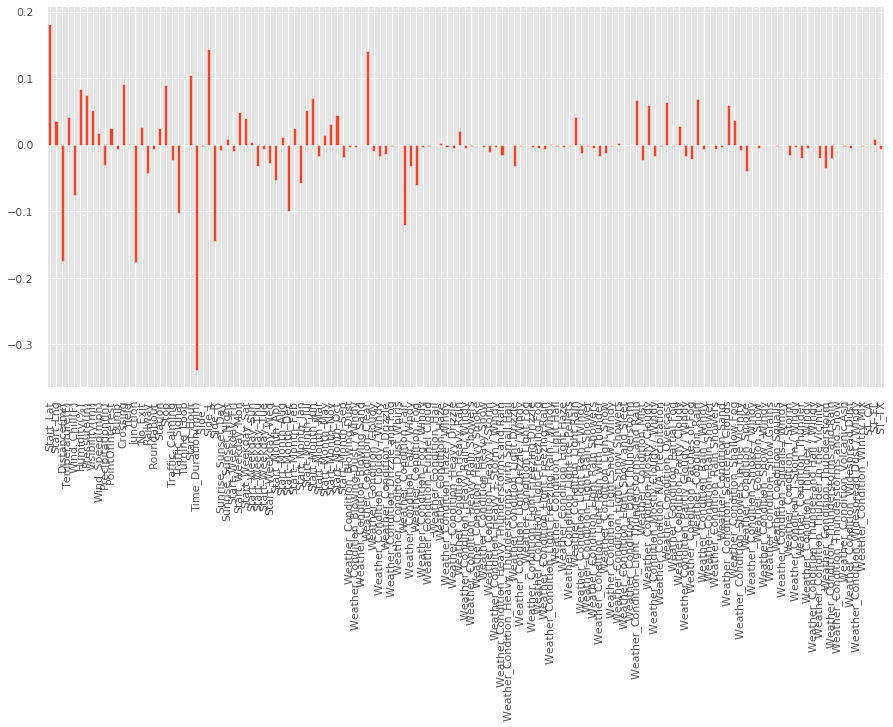

In [245]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.style.use('ggplot')

variable_names = df_X_train.columns

weights = pd.Series(lr_clf.coef_[0],index=variable_names)
weights.plot(kind='bar')
plt.show()

## Model Advantages - 10pts

## Interpretation - 30pts

## SVM Insight - 10pts